<a href="https://colab.research.google.com/github/CIA-Oceanix/DLCourse_MOi_2022/blob/main/notebooks/notebook_MNIST_classification_MLP_CNN_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep classification on Fashion-MNIST using pytorch


---



## 1- Data management <a class="anchor" id="section_1"></a>

Start with these lines of code to automatically download the Fashion-MNIST dataset.

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.ToTensor()

#train_data = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = transform)
#test_data = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = transform)

train_data = datasets.MNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'data', train = False, download = True, transform = transform)


In [ ]:
train_data.train_labels

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
# keep a subset of the training dataset
#evens = list(range(0, len(train_data), 4))

#train_data = torch.utils.data.Subset(train_data, evens)


#### **Size and structure of MNIST Datasets** - MNIST (Fashion-MNIST) is a dataset consisting of a training set of A examples and a test set of B examples. Each example is a CxC grayscale image, associated with a label from D classes. What are the values for A, B, C and D? <a class="anchor" id="question_1_1"></a>

In [ ]:
num_train, num_test = len(train_data), len(test_data) # TO DO
print('A =', num_train) # TO DO
print('B =', num_test) # TO DO
print('C =', train_data.data.shape[1]) # TO DO
print('D =', len(train_data.classes)) # TO DO

A = 60000
B = 10000
C = 28
D = 10


#### **Recover the labels of the classes** of MNIST dataset

In [ ]:
class_names = train_data.classes
print(class_names)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


#### **Dataloader creation** - Check data loader documentation ([documentation](https://pytorch.org/docs/stable/data.html)) for training, validation and test sets. <a class="anchor" id="question_1_2"></a>

In [ ]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

batch_size = 20
valid_size = 0.2
train_size = 0.3

def create_data_loaders(batch_size, valid_size, train_data, test_data): # FUNCTION TO BE COMPLETED

  num_train = len(train_data)
  indices = list(range(num_train))
  np.random.shuffle(indices)
  nb_train = int( np.floor(train_size * num_train ))
  split = int(np.floor(valid_size * num_train))
  train_index, valid_index = indices[split:nb_train], indices[:split]

  train_sampler = SubsetRandomSampler(train_index)
  valid_sampler = SubsetRandomSampler(valid_index)

  train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = train_sampler)
  valid_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = valid_sampler)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

  return train_loader, valid_loader, test_loader

In [ ]:
train_loader, valid_loader, test_loader = create_data_loaders(batch_size, valid_size, train_data, test_data) # TO DO

#### **MNIST samples** - Visualize some images from the training set with corresponding ground truth labels. <a class="anchor" id="question_1_3"></a>

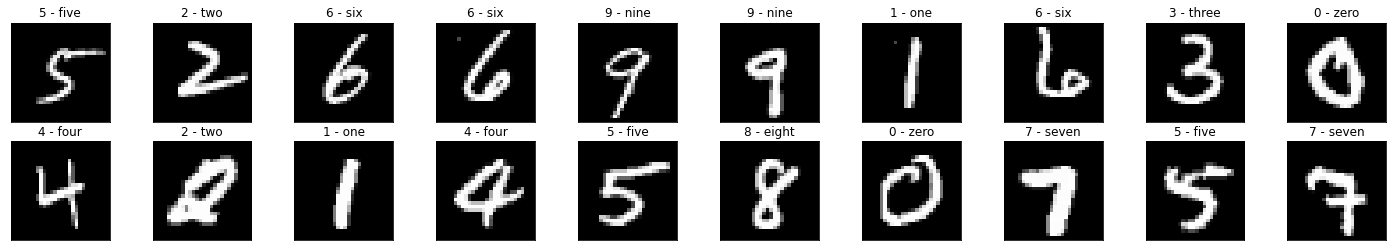

In [ ]:
# CELL TO BE COMPLETED
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_iter = iter(train_loader)
images, labels = data_iter.next()
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(class_names[labels[idx].item()]))

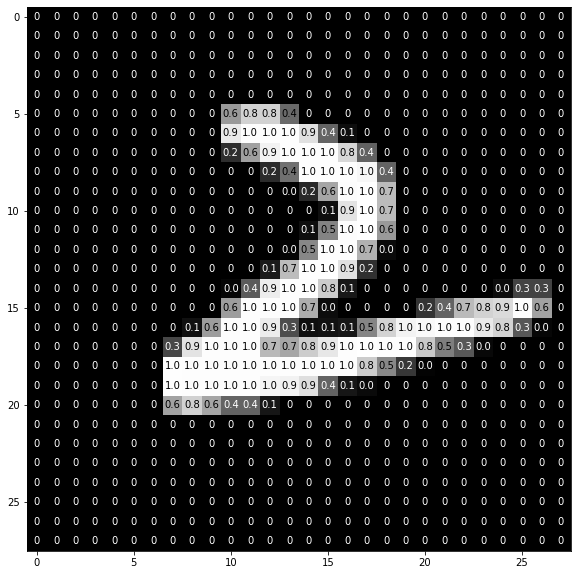

In [ ]:
# CELL TO BE COMPLETED
img = np.squeeze(images[1])
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],1) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x), horizontalalignment='center', verticalalignment='center', color='white' if img[x][y]<thresh else 'black')

## 2- Multi-Layer Perceptron (MLP) <a class="anchor" id="section_2"></a>

First, let us use a multi-layer perceptron (MLP) to automatically classify Fashion-MNIST images.

#### **MLP architecture** - Define a MPL architecture with (at least) 2 fully-connected as well as dropout layers. <a class="anchor" id="question_2_1"></a>

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module): 
    def __init__(self): # FUNCTION TO BE COMPLETED
        super(MLP,self).__init__()
        hidden_1, hidden_2 = 512, 256
        self.fc1 = nn.Linear(28*28, hidden_1)
        self.fc2 = nn.Linear(hidden_1,hidden_2)
        self.fc3 = nn.Linear(hidden_2,10)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self,x): # FUNCTION TO BE COMPLETED
        x = x.view(-1,28*28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

#### **Traning scheme** - Train the pre-defined MLP network with cross entropy as loss function and stochastic gradient descent as optimization algorithm. <a class="anchor" id="question_2_2"></a>

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device '+str(device))

Using device cuda


In [ ]:
model_1 = MLP()
model_1.to(device=device)

MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
criterion = nn.CrossEntropyLoss() # TO DO

In [ ]:
optimizer = torch.optim.SGD(model_1.parameters(),lr = 0.01) # TO DO

In [ ]:
n_epochs = 30

def training(n_epochs, train_loader, valid_loader, model, criterion, optimizer): # FUNCTION TO BE COMPLETED

  train_losses, valid_losses = [], []
  valid_loss_min = np.Inf

  for epoch in range(n_epochs):
      train_loss, valid_loss = 0, 0
      
      model.train()
      for data, label in train_loader:
          data = data.to(device=device, dtype=torch.float32)
          label = label.to(device=device, dtype=torch.long)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, label)
          loss.backward()
          optimizer.step()
          train_loss += loss.item() * data.size(0)
      
      model.eval()
      for data, label in valid_loader:
          data = data.to(device=device, dtype=torch.float32)
          label = label.to(device=device, dtype=torch.long)
          with torch.no_grad():
              output = model(data)
          loss = criterion(output,label)
          valid_loss += loss.item() * data.size(0)

      train_loss /= len(train_loader.sampler)
      valid_loss /= len(valid_loader.sampler)
      train_losses.append(train_loss)
      valid_losses.append(valid_loss)
      
      print('epoch: {} \ttraining Loss: {:.6f} \tvalidation Loss: {:.6f}'.format(epoch+1, train_loss, valid_loss))

      if valid_loss <= valid_loss_min:
          print('validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
          valid_loss_min,
          valid_loss))
          torch.save(model.state_dict(), 'model.pt')
          valid_loss_min = valid_loss
      
  return train_losses, valid_losses      

In [ ]:
train_losses_1, valid_losses_1 = training(n_epochs, train_loader, valid_loader, model_1, criterion, optimizer) # TO DO

epoch: 1 	training Loss: 2.229213 	validation Loss: 2.099458
validation loss decreased (inf --> 2.099458).  Saving model ...
epoch: 2 	training Loss: 1.788177 	validation Loss: 1.324538
validation loss decreased (2.099458 --> 1.324538).  Saving model ...
epoch: 3 	training Loss: 1.046301 	validation Loss: 0.752196
validation loss decreased (1.324538 --> 0.752196).  Saving model ...
epoch: 4 	training Loss: 0.727481 	validation Loss: 0.566674
validation loss decreased (0.752196 --> 0.566674).  Saving model ...
epoch: 5 	training Loss: 0.590434 	validation Loss: 0.483046
validation loss decreased (0.566674 --> 0.483046).  Saving model ...
epoch: 6 	training Loss: 0.513643 	validation Loss: 0.439522
validation loss decreased (0.483046 --> 0.439522).  Saving model ...
epoch: 7 	training Loss: 0.478332 	validation Loss: 0.402035
validation loss decreased (0.439522 --> 0.402035).  Saving model ...
epoch: 8 	training Loss: 0.443324 	validation Loss: 0.383758
validation loss decreased (0.40203

#### **Check the training convergence** - Plot the evolution of the loss function for both training and validation sets with respect to epochs to study the convergence of the training process. <a class="anchor" id="question_2_3"></a>

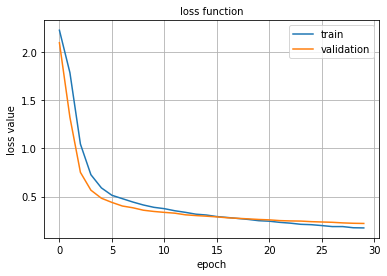

In [ ]:
# CELL TO BE COMPLETED
plt.plot(range(n_epochs), train_losses_1)
plt.plot(range(n_epochs), valid_losses_1)
plt.legend(['train', 'validation'], prop={'size': 10})
plt.title('loss function', size=10)
plt.xlabel('epoch', size=10)
plt.ylabel('loss value', size=10)
plt.grid()

Let us load the model corresponding to the lowest validation loss.

In [ ]:
model_1.load_state_dict(torch.load('model.pt', map_location=device))

<All keys matched successfully>

#### **Testing the trained MLP model ** - Test the best model on (unseen) test data and evaluate it’s performance in terms of overall and per-class accuracy scores. <a class="anchor" id="question_2_4"></a>

In [ ]:
def evaluation(model, test_loader, criterion): # FUNCTION TO BE COMPLETED

  test_loss = 0.0
  class_correct = list(0. for i in range(10))
  class_total = list(0. for i in range(10))

  model.eval()
  for data, label in test_loader:
      data = data.to(device=device, dtype=torch.float32)
      label = label.to(device=device, dtype=torch.long)
      with torch.no_grad():
          output = model(data)
      loss = criterion(output, label)
      test_loss += loss.item()*data.size(0)
      _, pred = torch.max(output, 1)
      correct = np.squeeze(pred.eq(label.data.view_as(pred)))
      for i in range(len(label)):
          digit = label.data[i]
          class_correct[digit] += correct[i].item()
          class_total[digit] += 1

  test_loss = test_loss/len(test_loader.sampler)
  print('test Loss: {:.6f}\n'.format(test_loss))
  for i in range(10):
      print('test accuracy of %s: %2d%% (%2d/%2d)' % (class_names[i], 100 * class_correct[i] / class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
  print('\ntest accuracy (overall): %2.2f%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

In [ ]:
evaluation(model_1, test_loader, criterion) # TO DO

test Loss: 0.215177

test accuracy of 0 - zero: 98% (965/980)
test accuracy of 1 - one: 97% (1112/1135)
test accuracy of 2 - two: 93% (964/1032)
test accuracy of 3 - three: 93% (943/1010)
test accuracy of 4 - four: 92% (904/982)
test accuracy of 5 - five: 90% (810/892)
test accuracy of 6 - six: 95% (913/958)
test accuracy of 7 - seven: 94% (971/1028)
test accuracy of 8 - eight: 86% (840/974)
test accuracy of 9 - nine: 91% (922/1009)

test accuracy (overall): 93.44% (9344/10000)


#### **Uncorrect classifications** - Visualize some incorrect predictions by displaying test images and labels in the format: "predicted (ground-truth)". <a class="anchor" id="question_2_5"></a>

In [ ]:
def get_all_prediction(model, loader): # FUNCTION TO BE COMPLETED
    preds = torch.tensor([], dtype=torch.long)
    targets = torch.tensor([], dtype=torch.long)
    for data, label in loader:
        data = data.to(device=device, dtype=torch.float32)
        label = label.to(device=device, dtype=torch.long)
        with torch.no_grad():
            output = model(data)
        targets = torch.cat((targets, label.cpu()), dim = 0)
        preds = torch.cat((preds, torch.max(output.cpu(), 1)[1]), dim = 0)
    return targets.numpy(), preds.numpy()

In [ ]:
targets, preds_1 = get_all_prediction(model_1, test_loader) # TO DO

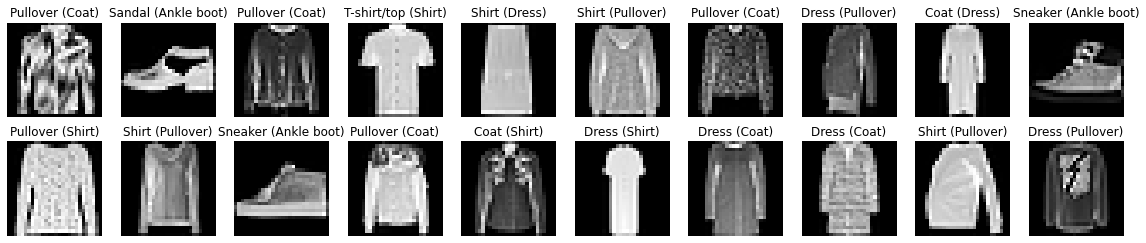

In [ ]:
index = np.where(preds_1 - targets != 0)[0]
test_set_array = test_data.data.numpy()
plt.figure(figsize=(20, 4))
for i in range(20):
  plt.subplot(2, 10, i + 1)
  plt.axis('off')
  plt.imshow(test_set_array[index[i],:,:], cmap='gray')
  plt.title("{} ({})".format(class_names[preds_1[index[i]]], class_names[targets[index[i]]]))
plt.show()

## 3- Convolutional neural network (CNN) <a class="anchor" id="section_3"></a>

Let us now switch from MLP to convolutional neural network (CNN) to classify Fashion-MNIST images.

#### **CNN architecture** - Define a CNN architecture using (at least) 2 patterns [CONV - CONV - POOL] as well as dropout and fully-connected layers. <a class="anchor" id="question_3_1"></a>

In [ ]:
class CNN(nn.Module):

    def __init__(self): # FUNCTION TO BE COMPLETED
        super(CNN,self).__init__()
        
        self.conv1 = ###
        self.relu1 = nn.ReLU()
        self.conv2 = ####
        self.relu2 = nn.ReLU()
        self.maxp1 = ###

        self.conv3 = ###
        self.relu3 = nn.ReLU()
        self.conv4 = ###
        self.relu4 = nn.ReLU()
        self.maxp2 = ####
        self.drop1 = nn.Dropout(0.25)

        self.fcon1 = ###
        self.relu5 = nn.ReLU()
        self.drop2 = ####
        self.fcon2 = ###

    def forward(self,x): # FUNCTION TO BE COMPLETED
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.maxp1(out)
        out = self.conv3(out)
        out = self.relu3(out)
        out = self.conv4(out)
        out = self.relu4(out)
        out = self.maxp2(out)
        out = self.drop1(out)
        out = out.view(out.size(0), -1)
        out = self.fcon1(out)
        out = self.relu5(out)
        out = self.drop2(out)
        out = self.fcon2(out)
        return out

In [ ]:
from torchsummary import summary

model_2 = CNN()
model_2.to(device=device)

summary(model_2, (1, 28, 28)) # TO DO

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          18,496
              ReLU-4           [-1, 64, 24, 24]               0
         MaxPool2d-5           [-1, 64, 12, 12]               0
            Conv2d-6           [-1, 64, 10, 10]          36,928
              ReLU-7           [-1, 64, 10, 10]               0
            Conv2d-8             [-1, 64, 8, 8]          36,928
              ReLU-9             [-1, 64, 8, 8]               0
        MaxPool2d-10             [-1, 64, 4, 4]               0
          Dropout-11             [-1, 64, 4, 4]               0
           Linear-12                  [-1, 128]         131,200
             ReLU-13                  [-1, 128]               0
          Dropout-14                  [

#### **CNN training scheme** - Train the pre-defined CNN network with cross entropy as loss function and stochastic gradient descent as optimization algorithm. <a class="anchor" id="question_3_3"></a>

In [ ]:
optimizer =  # TO DO

In [1]:
 # TO DO

#### **Training convergence** - Display in a single graph the loss functions for training and validation sets obtained with both MLP and CNN models. <a class="anchor" id="question_3_4"></a>

In [2]:
# CELL TO BE COMPLETED


As previously, we load the model corresponding to the lowest validation loss.

In [ ]:
model_2.load_state_dict(torch.load('xxxx.pt', map_location=device)) # To pe updated

<All keys matched successfully>

#### **Testing a trained CNN model** - Test the model on test data and evaluate it through overall and per-class accuracy scores. Compare these scores with the ones obtained using MLP. <a class="anchor" id="question_3_5"></a>

In [3]:
 # TO DO

#### **Incorrect classifications** - Display CNN results for images whose prediction was incorrect with MLP. Labels should be indicated in the following format: "CNN label (ground-truth)" in red if wrong, green otherwise. <a class="anchor" id="question_3_6"></a>

In [4]:
 # TO DO

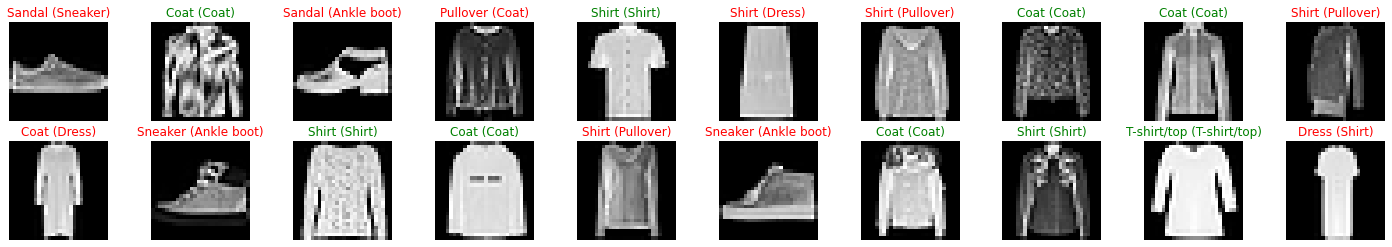

#### **Confusion matrix** - Display the confusion matrix for both MLP and CNN models. <a class="anchor" id="question_3_7"></a>

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    # This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')